# WeGo Public Transit
[WeGo Public Transit](https://www.wegotransit.com/) is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

In this project, you'll be analyzing the bus spacing to look for patterns and try to identify correlations to controllable or external factors. Specifically, you'll be using a dataset containing information on the headway, or amount of time between vehicle arrivals at a stop. This dataset contains a column HDWY_DEV, which shows the headway deviation. This variable will be negative when bunching has occurred (shorter headway than scheduled) and will be positive for gapping (longer headway than scheduled). Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY.

Goals of this project:
1. How much impact does being late or too spaced out at the first stop have downstream?
2. What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time)? Does more layover lead to more stable headways (lower values for % headway deviation)?
3. How closely does lateness (ADHERENCE) correlate to headway?
4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has travelled?
5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.
6. How does direction of travel, route, or location affect the headway and on-time performance?
7. How does time of day or day of week affect headway and on-time performance? Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?
8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_weather.csv contains historical weather data recorded at Nashville International Airport. 

In [1]:
#(some sort of grouping or calculations across rows for #1)

In [2]:
#Methodology....
##1add rows to the df that include first_stop hdwy(A) and downstream_hdwy(B) in a way that they can interact with 
##each other...
##2add rows that divide 1st stop headway by each instance of downstream headway (B/A)
##3subset to a single trip_id
##4Expand to 3 to four trips.
###How best to display data? Use mariels adherence plot as inspiration...
##5Expand to an entire ROUTE_ABBR or Day.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#how to decode?
#check how to correctly specify pathway...
#Ask michael some clarifying q's on below.  Should've just run on pd.read_excel

#Original data read in.  Takes 2 mins, so converted to a CSV.
file_path='C:/Users/micha/Documents/NSS_Projects/wego-boooleans/data/Headway Data, 8-1-2023 to 9-30-2023.xlsx'
df_hw = pd.read_excel(file_path)
df_hw

df_hw.to_csv('wego_data_1.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#Route 7 is three out and three back
#Route 22 is four out and three back

In [7]:
df_hw = pd.read_csv('wego_data_1.csv', index_col=False)
df_hw.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df_hw['PERC_HDWY'] = (df_hw['HDWY_DEV']/df_hw['SCHEDULED_HDWY'])
df_hw.loc[30:100]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
30,120230801,1,99457920,2023-08-01,22,2200,1040,345112,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,09:10:00,09:05:34,09:05:34,4.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,280,0.000000,NaN
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,09:15:00,09:05:34,09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,281,10.883333,-0.026667
32,120230801,1,99457922,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,09:26:00,09:24:44,09:24:44,1.266666,16.0,10.483333,-5.516667,1,0,0,0,0.0,0,296,0.000000,-0.344792
33,120230801,1,99457923,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,09:36:00,09:33:50,09:33:50,2.166666,NaN,NaN,NaN,0,0,1,0,NaN,0,307,0.000000,NaN
34,120230801,1,99457924,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,09:40:00,09:33:50,09:42:42,-2.700000,55.0,55.100000,0.100000,0,0,1,0,0.0,0,308,8.866666,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,120230801,1,99457986,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,20:36:00,20:40:19,20:40:19,-4.316666,NaN,NaN,NaN,0,0,1,0,NaN,0,910,0.000000,NaN
97,120230801,1,99457987,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,20:43:00,20:40:19,20:42:03,0.950000,68.0,60.533333,-7.466667,0,0,1,0,0.0,0,911,1.733333,-0.109804
98,120230801,1,99457988,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,20:52:00,20:56:38,20:56:38,-4.633333,33.0,35.750000,2.750000,0,0,1,0,0.0,0,927,0.000000,0.083333
99,120230801,1,99457989,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,21:08:00,21:05:04,21:05:04,2.933333,NaN,NaN,NaN,0,0,1,0,NaN,0,943,0.000000,NaN


In [8]:
df_hw.loc[30:100]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
30,120230801,1,99457920,2023-08-01,22,2200,1040,345112,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,09:10:00,09:05:34,09:05:34,4.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,280,0.000000,NaN
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,09:15:00,09:05:34,09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,281,10.883333,-0.026667
32,120230801,1,99457922,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,09:26:00,09:24:44,09:24:44,1.266666,16.0,10.483333,-5.516667,1,0,0,0,0.0,0,296,0.000000,-0.344792
33,120230801,1,99457923,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,09:36:00,09:33:50,09:33:50,2.166666,NaN,NaN,NaN,0,0,1,0,NaN,0,307,0.000000,NaN
34,120230801,1,99457924,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,09:40:00,09:33:50,09:42:42,-2.700000,55.0,55.100000,0.100000,0,0,1,0,0.0,0,308,8.866666,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,120230801,1,99457986,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,20:36:00,20:40:19,20:40:19,-4.316666,NaN,NaN,NaN,0,0,1,0,NaN,0,910,0.000000,NaN
97,120230801,1,99457987,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,20:43:00,20:40:19,20:42:03,0.950000,68.0,60.533333,-7.466667,0,0,1,0,0.0,0,911,1.733333,-0.109804
98,120230801,1,99457988,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,20:52:00,20:56:38,20:56:38,-4.633333,33.0,35.750000,2.750000,0,0,1,0,0.0,0,927,0.000000,0.083333
99,120230801,1,99457989,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,21:08:00,21:05:04,21:05:04,2.933333,NaN,NaN,NaN,0,0,1,0,NaN,0,943,0.000000,NaN


In [9]:
df_corr1 = df_hw['ADHERENCE'].corr(df_hw['ACTUAL_HDWY'])
df_corr1

-0.07471899346736784

In [10]:
#review basic data types.
df_hw.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [11]:
#If route ABBR are just the abbreviations to the routes, there are only 8?
df_hw.value_counts('ROUTE_ABBR')

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25958
7     18026
dtype: int64

In [12]:
#Headway deviation = amount of time between vehicle arrivals at a stop.  This variable will be negative when bunching 
#has occurred (shorter headway than scheduled) and will be positive for gapping (longer headway than scheduled).
df_hw.value_counts('HDWY_DEV')

HDWY_DEV
 0.000000      760
 0.016666      699
-0.100000      660
-0.016667      640
-0.116667      619
              ... 
 32.483333       1
 32.533333       1
 32.550000       1
 32.566666       1
 565.433333      1
Length: 4217, dtype: int64

In [13]:
df_hw.value_counts('BLOCK_ABBR')

BLOCK_ABBR
300     8894
2312    8532
2310    8233
5003    8086
5004    8048
        ... 
6401      72
8405      72
8604      72
9302      72
9975      72
Length: 102, dtype: int64

In [14]:
pd.set_option('display.max_rows', 500)

In [15]:
#Q's
#What is BLOCK_ABBR?
#IS ROUTE_ABBR actually the route? or something else.  Did MTA run 50 runs of 7 on 8-1-2023?
#Destination	
#HILLSBORO TRANSIT CENTER  21ST AVE S & CHILDRENS WAY   NB CENTRAL 5TH AVE - BAY 9   CENTRAL 4TH AVE - BAY 20
#DOWNTOWN	5:46 AM	             5:54 AM	                    6:10 AM	-
#Where are bus times? are they included here?
#

In [16]:
#NaN is if there's no HDWY_DEV
df7 = df_hw[(df_hw['ROUTE_ABBR'] == 7) & (df_hw['DATE'] == '2023-08-01')]
df7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,14:31:00,14:31:27,14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,2,0.000000,-0.923333
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,14:41:00,14:46:54,14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,11,0.000000,-0.603333
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,15:00:00,15:05:41,15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,23,0.000000,NaN
6134,120230801,1,99465615,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,2,NaN,NaN
6135,120230801,1,99465616,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,05:28:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,13,NaN,NaN
6136,120230801,1,99465617,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,05:40:00,05:09:44,05:09:44,30.266666,NaN,NaN,NaN,0,0,1,0,NaN,0,27,0.000000,NaN
6137,120230801,1,99465618,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,05:46:00,05:09:44,05:11:45,34.250000,NaN,NaN,NaN,1,0,0,0,0.0,0,28,2.016666,NaN
6138,120230801,1,99465619,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,05:54:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,37,NaN,NaN
6139,120230801,1,99465620,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,06:10:00,05:20:00,05:20:00,50.000000,NaN,NaN,NaN,1,0,0,0,NaN,0,49,0.000000,NaN
6140,120230801,1,99465621,2023-08-01,7,700,3144,348423,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,06:15:00,05:20:00,05:27:29,47.516666,10.0,NaN,NaN,1,0,0,0,0.0,0,50,7.483333,NaN


In [17]:
#For route 7 on 8-1-2023, there were 211 HDWY_DEV recorded
#211/330 = 64% of the time there was a deviance issue 
#max=20.77
#min=-19.167
df7.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
count,330.0,330.0,3.300000e+02,330.0,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,309.000000,216.000000,211.000000,211.000000,330.000000,330.000000,330.000000,330.000000,220.000000,330.000000,330.000000,309.000000,211.000000
mean,120230801.0,1.0,9.946574e+07,7.0,733.509091,1819.906061,348550.481818,0.009091,3.996970,0.996970,36.137767,-86.798421,5.059008,20.675926,21.161532,0.303712,0.130303,0.172727,0.633333,0.009091,0.009091,0.027273,235.472727,3.883603,0.014663
std,0.0,0.0,4.690609e+02,0.0,323.042341,957.800438,196.701032,0.095056,0.823288,0.819587,0.024342,0.012688,23.904244,7.749963,10.418815,6.909897,0.337148,0.378585,0.482626,0.095056,0.095128,0.163124,159.077357,6.804444,0.375407
min,120230801.0,1.0,9.946096e+07,7.0,700.000000,341.000000,346716.000000,0.000000,2.000000,0.000000,36.107575,-86.812719,-22.783333,10.000000,0.833333,-19.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-0.958333
25%,120230801.0,1.0,9.946570e+07,7.0,701.000000,723.000000,348488.000000,0.000000,3.000000,0.000000,36.107575,-86.812719,-4.316666,15.000000,14.450000,-2.658333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,0.000000,-0.118056
50%,120230801.0,1.0,9.946578e+07,7.0,703.000000,2164.000000,348615.500000,0.000000,4.000000,1.000000,36.138881,-86.800622,-1.716666,20.000000,19.900000,0.016666,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000833
75%,120230801.0,1.0,9.946587e+07,7.0,704.000000,2500.000000,348643.000000,0.000000,5.000000,2.000000,36.167091,-86.781923,-0.116666,20.000000,27.766666,2.358333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,356.500000,6.750000,0.105983
max,120230801.0,1.0,9.946595e+07,7.0,4101.000000,3144.000000,348670.000000,1.000000,5.000000,2.000000,36.167091,-86.781923,88.383333,60.000000,71.483333,20.766666,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,625.000000,37.883333,1.384444


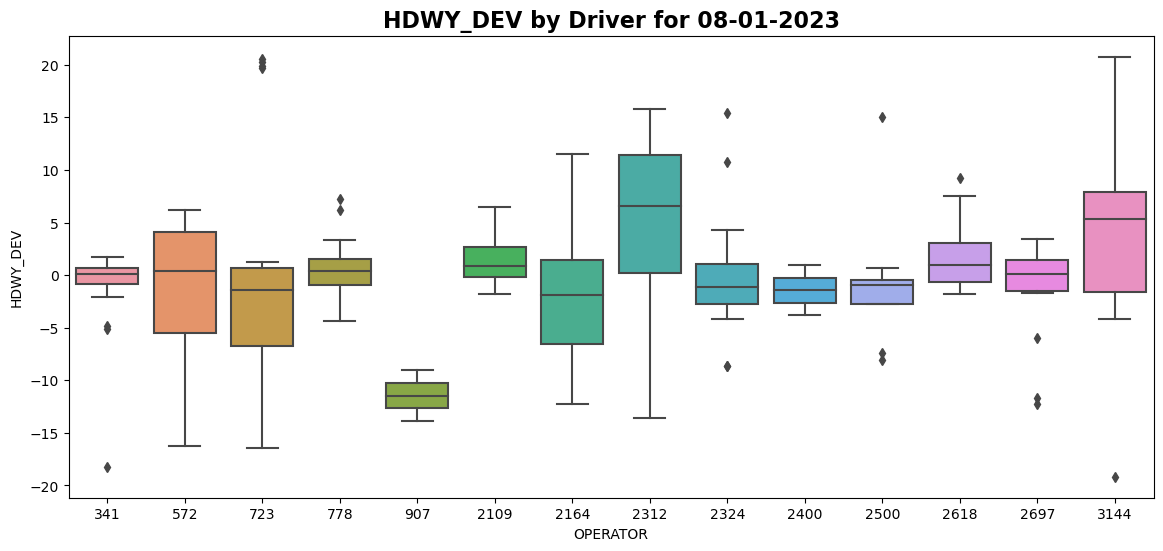

In [18]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.boxplot(data = df7, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

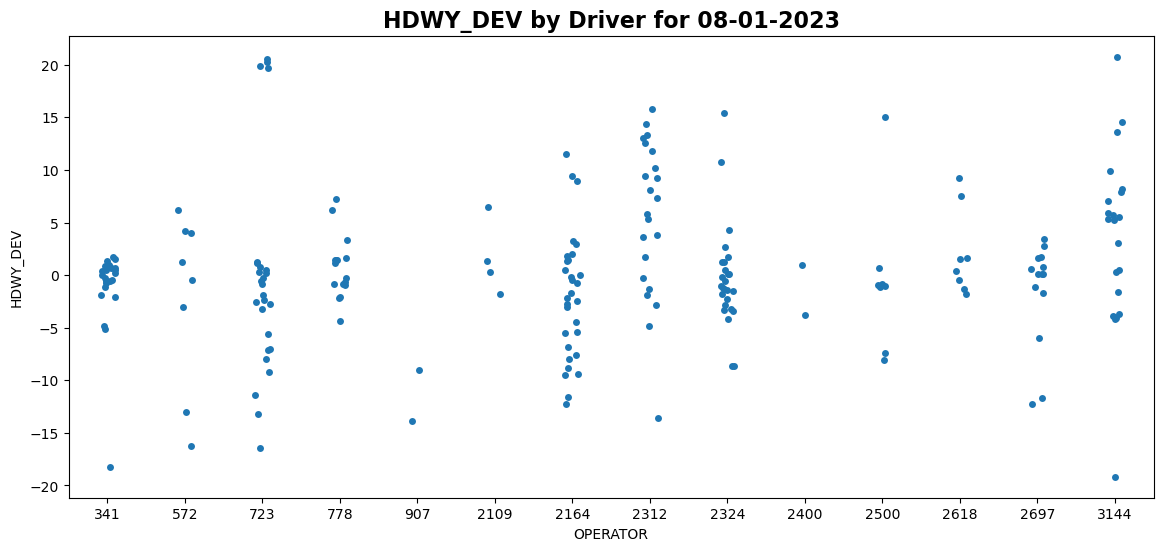

In [19]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df7, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

In [20]:
#Comparisons of drivers on 08-01-2023
#907 30 entries
#314 35 entries
#3144 39 entries
#778 24 entires


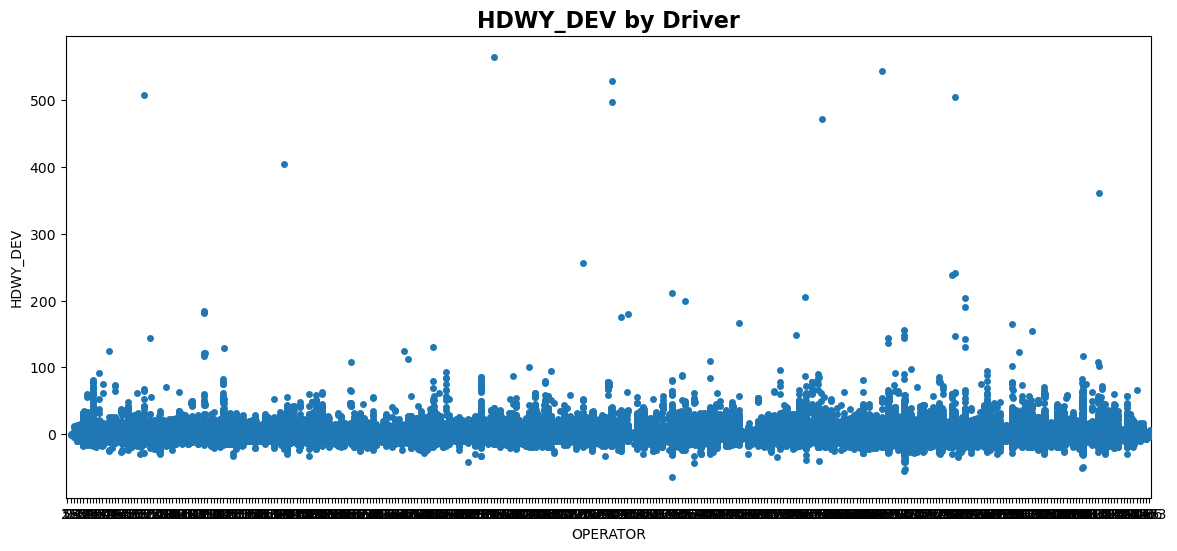

In [21]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df_hw, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver', fontsize = fontsize, fontweight = 'bold');

In [22]:
df_hw.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [23]:
df_q1 = df_hw[['ROUTE_ABBR','TRIP_ID','ADHERENCE','SCHEDULED_TIME','ACTUAL_ARRIVAL_TIME','TRIP_EDGE','ACTUAL_HDWY','SCHEDULED_HDWY','PERC_HDWY' ]]
df_q1.loc[897:903]

,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY
897,23,345577,-1.050000,07:03:00,06:49:55,1,9.466666,12.0,-0.211111
898,23,345577,-0.450000,07:09:00,07:09:27,0,9.200000,12.0,-0.233333
899,23,345577,-0.533333,07:16:00,07:16:32,0,10.133333,12.0,-0.155556
900,23,345577,-1.716666,07:24:00,07:25:43,0,NaN,NaN,NaN
901,23,345577,-1.450000,07:39:00,07:25:43,0,21.966666,24.0,-0.084722
902,23,345577,-5.666666,07:48:00,07:53:40,0,25.966666,24.0,0.081944
903,23,345577,-3.533333,07:58:00,08:01:32,2,NaN,NaN,NaN


In [24]:
#df['new_col'] = df.apply(lambda row: row['col2'] if row['col1'] == 1 else 0, axis=1)
df_q1['FIRST_STOP_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
df_q1['DOWNSTREAM_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)
df_q1[898:903]

C:\Users\micha\AppData\Local\Temp\ipykernel_22480\2144731798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1['FIRST_STOP_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
C:\Users\micha\AppData\Local\Temp\ipykernel_22480\2144731798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1['DOWNSTREAM_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)


,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY
898,23,345577,-0.450000,07:09:00,07:09:27,0,9.200000,12.0,-0.233333,0.0,9.200000
899,23,345577,-0.533333,07:16:00,07:16:32,0,10.133333,12.0,-0.155556,0.0,10.133333
900,23,345577,-1.716666,07:24:00,07:25:43,0,NaN,NaN,NaN,0.0,NaN
901,23,345577,-1.450000,07:39:00,07:25:43,0,21.966666,24.0,-0.084722,0.0,21.966666
902,23,345577,-5.666666,07:48:00,07:53:40,0,25.966666,24.0,0.081944,0.0,25.966666


In [25]:
df_hw['FIRST_STOP_HDWY'] = df_hw.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
df_hw['DOWNSTREAM_HDWY'] = df_hw.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)
#df_hw.loc[50:53]

In [26]:
#df_hw['FIRST_STOP_HDWY'] = df_hw['FIRST_STOP_HDWY'].replace(np.nan, 0)
df_hw['FS_HDWY'] = df_hw.groupby(['TRIP_ID'])['FIRST_STOP_HDWY'].transform(sum)
df_t1 = df_hw[['TRIP_ID', 'PERC_HDWY', 'FIRST_STOP_HDWY','FS_HDWY','DOWNSTREAM_HDWY']]
df_hw.loc[246:248]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY
246,120230801,1,99458140,2023-08-01,22,2202,1190,345304,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,13:45:00,13:29:32,13:45:41,-0.683333,50.0,50.600000,0.600000,0,0,1,0,0.0,0,217,16.15,0.012000,50.6,0.000000,155.866666
247,120230801,1,99458141,2023-08-01,22,2202,1190,345304,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,13:54:00,13:53:31,13:53:31,0.483333,12.0,11.483333,-0.516667,0,0,1,0,0.0,0,233,0.00,-0.043056,0.0,11.483333,155.866666
248,120230801,1,99458142,2023-08-01,22,2202,1190,345304,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,14:10:00,14:03:32,14:03:32,6.466666,NaN,NaN,NaN,0,0,1,0,NaN,0,249,0.00,NaN,0.0,NaN,155.866666


In [27]:
df_hw.loc[20:24]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY
20,120230801,1,99457910,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,07:31:00,07:30:25,07:30:25,0.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,180,0.00,NaN,0.000000,NaN,43.283332
21,120230801,1,99457911,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,07:36:00,07:34:00,07:34:00,2.000000,NaN,NaN,NaN,0,0,1,0,NaN,0,187,0.00,NaN,0.000000,NaN,43.283332
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,07:45:00,07:34:00,07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,188,12.25,-0.004233,62.733333,0.0,188.016666
23,120230801,1,99457913,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,07:54:00,07:55:51,07:55:51,-1.850000,15.0,16.000000,1.000000,0,0,1,0,0.0,0,204,0.00,0.066667,0.000000,16.0,188.016666
24,120230801,1,99457914,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,08:10:00,08:05:31,08:05:31,4.483333,NaN,NaN,NaN,0,0,1,0,NaN,0,220,0.00,NaN,0.000000,NaN,188.016666


#df_hw['FS_HEADWAY'] = df_hw.groupby(['ROUTE_ABBR', (df_hw['TRIP_ID'] == 1)])['ACTUAL_HDWY'].transform(lambda x: x == x.max())
#df_ex['MaxRaisePer'] = df_ex.groupby(['State', 'District'])['Raised'].transform(lambda x: x == x.max())
#Write a code that .groupby by TRIP_ID, then subsets by TRIP_EDGE == 1 and returns ACTUAL_HEADWAY to a new column. 
df_hw['GROUP']=np.where(df_hw['TRIP_ID'] == 1, 'TRIP_ID', 'OTHER_TRIP_ID')
df_hw['FS_HEADWAY'] = df_hw.groupby(['ROUTE_ABBR','GROUP'])['ACTUAL_HDWY'].transform(lambda x: x == x.max())

In [28]:
#start with the first one.  Perhaps use one of these as baseline?  
q1_sample1 = df_q1[897:904]
q1_sample1

,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY
897,23,345577,-1.050000,07:03:00,06:49:55,1,9.466666,12.0,-0.211111,9.466666,0.000000
898,23,345577,-0.450000,07:09:00,07:09:27,0,9.200000,12.0,-0.233333,0.000000,9.200000
899,23,345577,-0.533333,07:16:00,07:16:32,0,10.133333,12.0,-0.155556,0.000000,10.133333
900,23,345577,-1.716666,07:24:00,07:25:43,0,NaN,NaN,NaN,0.000000,NaN
901,23,345577,-1.450000,07:39:00,07:25:43,0,21.966666,24.0,-0.084722,0.000000,21.966666
902,23,345577,-5.666666,07:48:00,07:53:40,0,25.966666,24.0,0.081944,0.000000,25.966666
903,23,345577,-3.533333,07:58:00,08:01:32,2,NaN,NaN,NaN,0.000000,NaN


#find the perfect sample, with little to no headway 
q1_sample_2 = df_q1[(df_q1['FIRST_STOP_HDWY'] <= 1)&(df_q1['DOWNSTREAM_HDWY'] <= 1)&(df_hw['ROUTE_ABBR'] == 23)]
q1_sample_2

In [30]:

#Q1 - How much impact does being late or too spaced out at the first stop have downstream?
    
    #compared to each other...
#you can filter for rows where there's a gap on the first stop and then look and see how 
#it affects the final stop
# >>>filter for when each trip edge is = 1, then check hdwy_dev when it equals 2.  
# >>>how to subdivide it all out?
#>>>Pivot table didn't seem to work.
    #How to solve this problem?
        #1 aggregate by TRIP_ID (Possible pivot on ROUTE_ABBR and TRIP_ID)
        #2 Look in the TRIP_EDGE column for 1
        #3 Evaluate everything with a 0 or 2 in TRIP_ID
        #4 apply this to a small sample at first, say 08-01-2023
        #5 Compare to each other somehow?
    #OR
        #1 Make a yes/no column for ontime vs. not on the first stop.
        #2 Make a column with % in downstream effects
        #3 compare columns (maybe logistic regression?)
        #4 maybe even predict???
    #0R
        # Above but set up as poisson?
        #If data is not normally distributed, need to either normalize, or... 
#OR
    #1 Make a column with time that includes...( amount of headway if TRIP_EDGE = 1)
    #2 Make a column with % in downstream effects
    #3 compare columns (maybe linear regression?)
    #4 maybe even predict???

    #start simple. 
    #for each trip, start w/ trip edge one.  Pull out/filter down to trip edge 1 
    #trip and trip ID. compare adherence and deviation vs beginning vs end.  
    
    #heatmaps.
    #calculate summary stats.
    #look at TRIP ID perhaps, drop duplicates, use .sample to get a random sample...you 
    #will need to do them one at a time
    #

In [31]:
#Time Series Analysis:
#If your data includes a time component, such as arrival times at different stops recorded over time, you can use time 
#series analysis to model and forecast the impact of lateness/earliness at the first stop on later stops.
#Autoregressive Integrated Moving Average (ARIMA): If your data exhibits a time trend and seasonality, ARIMA models may 
#be appropriate.
#Exponential Smoothing: Exponential smoothing models, such as Holt-Winters, can also be used for time series forecasting.
#Vector Autoregression (VAR): If you have multiple time series (arrival times at different stops), you can use VAR models to analyze their interdependencies.
#Time series analysis would allow you to account for temporal dependencies and make forecasts based on past observations.

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
lm = smf.ols('ACTUAL_HDWY ~ FIRST_STOP_HDWY', data = df_q1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ACTUAL_HDWY   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 6.255e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:00:52   Log-Likelihood:            -1.0578e+06
No. Observations:              266061   AIC:                         2.116e+06
Df Residuals:                  266059   BIC:                         2.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.0360      0.027    591.873      0.000      15.983      16.089
FIRST_STOP_HDWY     0.5229      0.002    250.107      0.000       0.519       0.527
==============================================================================
Omnibus:                   456687.593   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1545163874.773
Skew:                          11.477   Prob(JB):                         0.00
Kurtosis:                     375.632   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df_q1

,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY
0,22,345104,-2.133333,04:42:00,04:37:38,1,NaN,NaN,NaN,NaN,0.000000
1,22,345104,-2.450000,04:46:00,04:48:27,0,NaN,NaN,NaN,0.000000,NaN
2,22,345104,-0.933333,04:54:00,04:54:56,0,NaN,NaN,NaN,0.000000,NaN
3,22,345104,6.283333,05:10:00,05:03:43,2,NaN,NaN,NaN,0.000000,NaN
4,22,345105,-1.583333,05:15:00,05:03:43,1,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
350323,7,353448,-8.433333,22:23:00,22:31:26,0,35.266666,30.0,0.175556,0.000000,35.266666
350324,7,353448,-11.300000,22:38:00,22:49:18,2,NaN,NaN,NaN,0.000000,NaN
350325,7,353449,-4.316666,22:45:00,22:49:19,1,31.866666,30.0,0.062222,31.866666,0.000000
350326,7,353449,-22.083333,22:59:00,23:21:05,0,47.500000,30.0,0.583333,0.000000,47.500000


df = df_q1

#Create new columns to store the results
df_q1['Start_HDWY_DEV'] = None
df_q1['End_HDWY_DEV'] = None

#Initialize variables to keep track of the current 1 and the last 0 before a 2
current_1_index = None
last_0_index = None

#Iterate through the DataFrame
for index, row in df_q1.iterrows():
    if row['TRIP_EDGE'] == 1:
        current_1_index = index
    elif row['TRIP_EDGE'] == 0:
        last_0_index = index
    elif row['TRIP_EDGE'] == 2:
        # Check if we found a 1 before and a 0 before the 2
        if current_1_index is not None and last_0_index is not None:
            # Update the 'Start_HDWY_DEV' and 'End_HDWY_DEV' columns
            df.at[current_1_index, 'Start_HDWY_DEV'] = df.at[current_1_index, 'FIRST_STOP_HDWY']
            df.at[last_0_index, 'End_HDWY_DEV'] = df.at[last_0_index, 'DOWNSTREAM_HDWY']
        # Reset the tracking variables
        current_1_index = None
        last_0_index = None

In [35]:
lm2 = smf.ols('DOWNSTREAM_HDWY ~ FIRST_STOP_HDWY', data = df_q1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ACTUAL_HDWY   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 6.255e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:00:52   Log-Likelihood:            -1.0578e+06
No. Observations:              266061   AIC:                         2.116e+06
Df Residuals:                  266059   BIC:                         2.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.0360      0.027    591.873      0.000      15.983      16.089
FIRST_STOP_HDWY     0.5229      0.002    250.107      0.000       0.519       0.527
==============================================================================
Omnibus:                   456687.593   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1545163874.773
Skew:                          11.477   Prob(JB):                         0.00
Kurtosis:                     375.632   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
df_2s_t = df_hw[(df_hw['TRIP_EDGE'] == 1)& (df_hw['PERC_HDWY'] <= .05)] 
df_2s_t

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,06:15:00,06:05:31,06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444,12.833333,0.0,40.833333
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,06:42:00,06:30:59,06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,124,12.533333,-0.003333,59.800000,0.0,179.216666
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,07:15:00,07:05:49,07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,158,10.916666,0.015556,15.233333,0.0,43.283332
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,07:45:00,07:34:00,07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,188,12.250000,-0.004233,62.733333,0.0,188.016666
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,08:15:00,08:05:31,08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,221,12.500000,-0.011111,14.833333,0.0,44.916666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350304,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,18:37:00,18:35:37,18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,386,4.433333,-0.006667,29.800000,0.0,273.616663
350307,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,19:15:00,19:06:51,19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,408,12.200000,-0.055000,28.350000,0.0,281.083331
350310,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,20:11:00,19:51:06,20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,434,21.566666,0.014444,30.433333,0.0,283.266663
350313,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,20:45:00,20:40:02,20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,456,8.250000,0.040000,31.200000,0.0,272.483329


In [37]:
# maybe a time series, quadratic, or logistic will be more appropriate.

In [38]:
#A kurtosis value of 375 is extremely high, and it typically suggests a dataset with very heavy tails and a very pronounced 
#peak. In a practical context, such a high kurtosis value could indicate the presence of extreme outliers or heavy-tailed 
#data.

In [39]:
lm3 = smf.ols('DOWNSTREAM_HDWY ~ FIRST_STOP_HDWY', data = df_q1, families=sm.families.Binomial()).fit()
lm3.summary()

C:\Users\micha\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DOWNSTREAM_HDWY   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                 5.207e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:00:52   Log-Likelihood:            -1.0578e+06
No. Observations:              266061   AIC:                         2.116e+06
Df Residuals:                  266059   BIC:                         2.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.0360      0.027    591.873      0.000      15.983      16.089
FIRST_STOP_HDWY    -0.4771      0.002   -228.196      0.000      -0.481      -0.473
==============================================================================
Omnibus:                   456687.593   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1545163874.773
Skew:                          11.477   Prob(JB):                         0.00
Kurtosis:                     375.632   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
df_hw.loc[50:70]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY
50,120230801,1,99457940,2023-08-01,22,2200,2374,345119,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,12:30:00,12:26:05,12:26:05,3.916666,NaN,NaN,NaN,0,0,1,0,NaN,1,475,0.000000,NaN,0.000000,NaN,136.433332
51,120230801,1,99457941,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,12:40:00,12:26:05,12:42:07,-2.116666,12.0,14.800000,2.800000,0,0,1,0,0.0,0,476,16.033333,0.233333,14.800000,0.000000,42.150000
52,120230801,1,99457942,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,12:52:00,12:53:34,12:53:34,-1.566666,12.0,14.416666,2.416666,0,0,1,0,0.0,0,491,0.000000,0.201389,0.000000,14.416666,42.150000
53,120230801,1,99457943,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,12:56:00,NaN,NaN,NaN,50.0,NaN,NaN,0,0,0,0,0.0,0,497,NaN,NaN,0.000000,NaN,42.150000
54,120230801,1,99457944,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,13:07:00,13:06:47,13:06:47,0.216666,50.0,49.150000,-0.850000,0,0,1,0,0.0,0,512,0.000000,-0.017000,0.000000,49.150000,42.150000
55,120230801,1,99457945,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,YGKG,13.0,2,36.203239,-86.840636,13:14:00,13:16:43,13:16:43,-2.716666,NaN,NaN,NaN,0,0,1,0,NaN,0,521,0.000000,NaN,0.000000,NaN,42.150000
56,120230801,1,99457946,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,13:21:00,13:16:43,13:20:02,0.966666,50.0,46.050000,-3.950000,0,0,1,1,1.0,0,522,3.316666,-0.079000,46.050000,0.000000,140.016666
57,120230801,1,99457947,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,13:29:00,13:28:59,13:28:59,0.016666,12.0,7.583333,-4.416667,0,0,1,0,0.0,0,534,0.000000,-0.368056,0.000000,7.583333,140.016666
58,120230801,1,99457948,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,13:45:00,13:41:10,13:41:10,3.833333,NaN,NaN,NaN,0,0,1,0,NaN,0,550,0.000000,NaN,0.000000,NaN,140.016666
59,120230801,1,99457949,2023-08-01,22,2200,2374,345122,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,13:55:00,13:41:10,13:57:16,-2.266666,12.0,11.166666,-0.833334,0,0,1,0,0.0,0,551,16.100000,-0.069445,11.166666,0.000000,37.649998


In [41]:

df_hw['DELTA_HDWY'] = df_hw['DOWNSTREAM_HDWY']/df_hw['FIRST_STOP_HDWY']
df_hw.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.5,NaN,NaN,0.0,0.0,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.0,NaN,0.0,NaN,0.0,NaN


In [42]:
#Methodology....
##1add rows to the df that include first_stop hdwy(A) and downstream_hdwy(B) in a way that they can interact with 
##each other...
##2add rows that divide 1st stop headway by each instance of downstream headway (B/A)
##3subset to a single trip_id
##4Expand to 3 to four trips.
###How best to display data? Use mariels adherence plot as inspiration...
##5Expand to an entire ROUTE_ABBR or Day.  